# Online Payment Fraud Detection using Machine Learning in Python

Here we will try to solve this issue with the help of machine learning in Python.

The dataset we will be using have these columns - 
|Feature	    |Description                                            |
|---------------|-------------------------------------------------------|
|step	        |tells about the unit of time                           |
|type	        |type of transaction done                               |
|amount	        |the total amount of transaction                        |
|nameOrg	    |account that starts the transaction                    |
|oldbalanceOrg	|Balance of the account of sender before transaction    |
|newbalanceOrg	|Balance of the account of sender after transaction     |
|nameDest	    |account that receives the transaction                  |
|oldbalanceDest	|Balance of the account of receiver before transaction  |
|newbalanceDest	|Balance of the account of receiver after transaction   |
|isFraud	    |The value to be predicted i.e. 0 or 1                  |

## 1. Importing Libraries and Datasets

Install required dependencies:
   ```bash
   pip install numpy pandas matplotlib seaborn scikit-learn xgboost
   ```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The dataset includes the features like type of payment, Old balance, amount paid, name of the destination, etc. You can download dataset from [here](https://drive.google.com/file/d/127JqP3WGjBVihR-ZcUR86T3wwy3_g63v/view?usp=sharing).

In [2]:
data = pd.read_csv('./data/online_payment_fraud_data.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## 2. Data Visualization

In this section, we will try to understand and compare all columns. 
Let's count the columns with different datatypes like Category, Integer, Float. 

In [5]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 3
Float variables: 5


Let's see the count plot of the Payment type column using Seaborn library.

<Axes: xlabel='type', ylabel='count'>

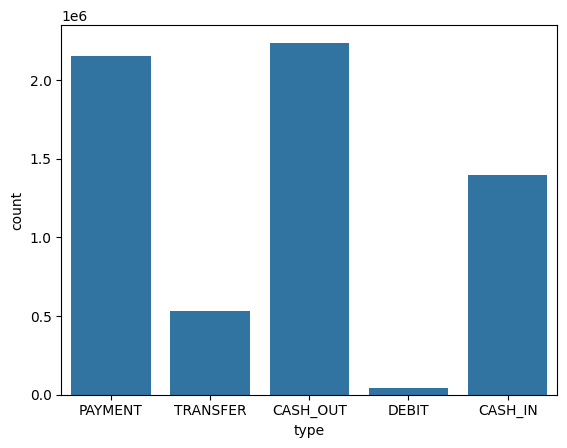

In [6]:
sns.countplot(x='type', data=data)

We can also use the bar plot for analyzing **Type** and **amount** column simultaneously.

<Axes: xlabel='type', ylabel='amount'>

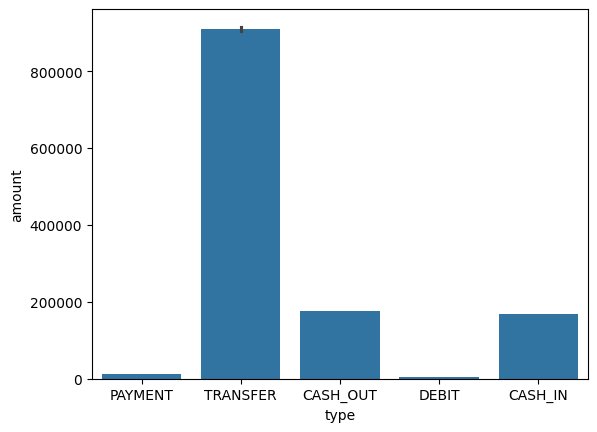

In [7]:
sns.barplot(x='type', y='amount', data=data)

Both the graph clearly shows that mostly the type cash_out and transfer are maximum in count and as well as in amount. 

Let's check the distribution of data among both the prediction values.

In [8]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

The dataset is already in same count. So there is no need of sampling.

Now let's see the distribution of the step column using distplot.

<Axes: xlabel='step', ylabel='Count'>

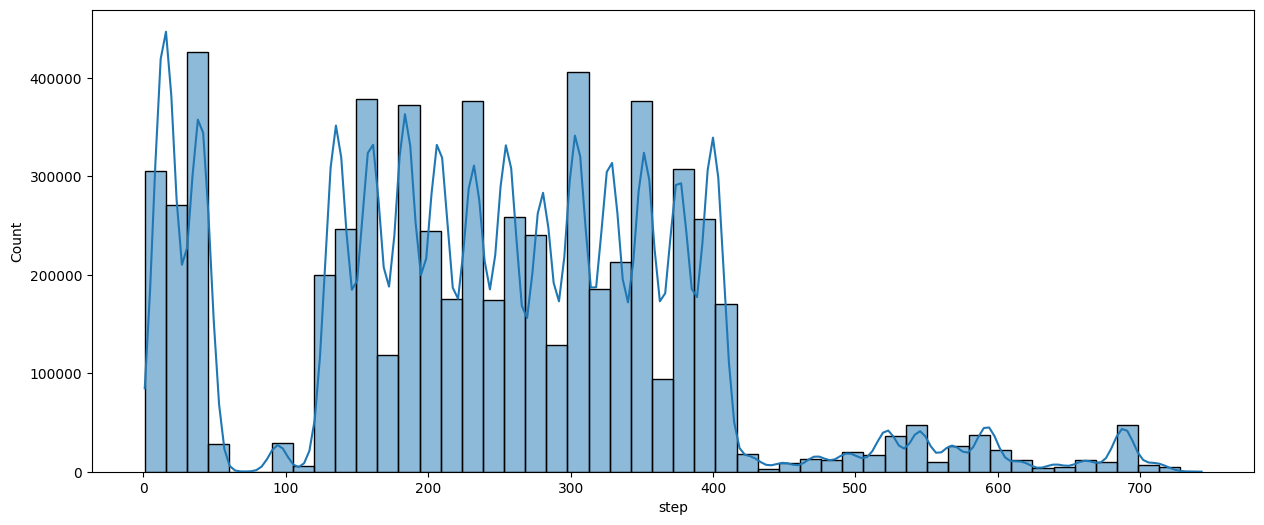

In [9]:
plt.figure(figsize=(15, 6))
sns.histplot(data['step'], bins=50, kde=True)

The graph shows the maximum distribution among 200 to 400 of step.

Now, Let's find the correlation among different features using Heatmap.

<Axes: >

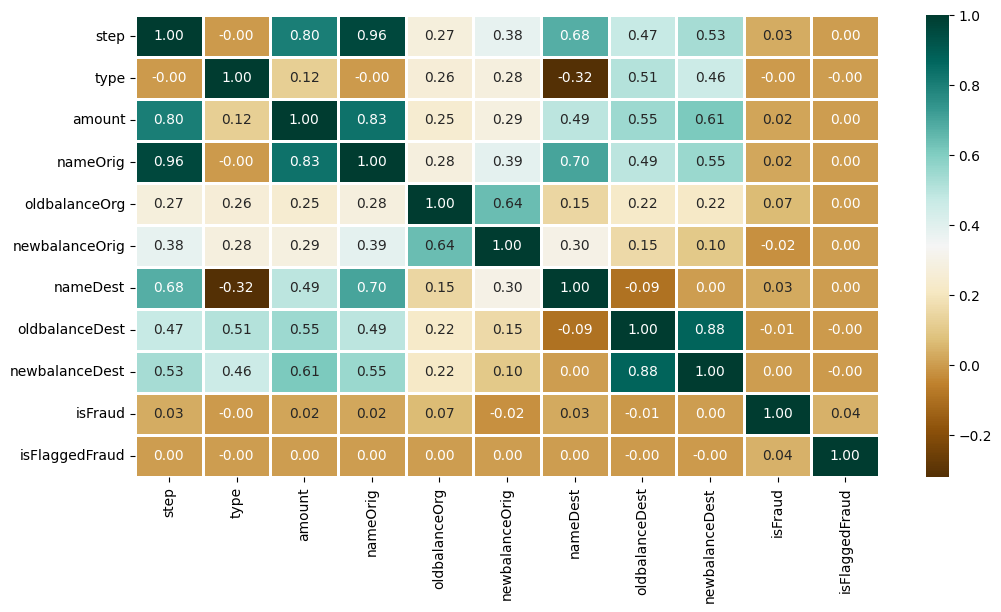

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

## 3. Data Preprocessing

This step includes the following : 
- Encoding of Type column
- Dropping irrelevant columns like nameOrig, nameDest
- Data Splitting

In [11]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


Once we done with the encoding, now we can drop the irrelevant columns. For that, follow the code given below.

In [12]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

Let's check the shape of extracted data.

In [13]:
X.shape, y.shape

((6362620, 11), (6362620,))

Now let's split the data into 2 parts : Training and Testing.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

## 4. Model Training

As the prediction is a classification problem so the models we will be using are :

- LogisticRegression :  It predicts that the probability of a given data belongs to the particular category or not.
- XGBClassifier : It refers to Gradient Boosted decision trees. In this algorithm, decision trees are created in sequential form and weights are assigned to all the independent variables which are then fed into the decision tree which predicts results.
- SVC : SVC is used to find a hyperplane in an N-dimensional space that distinctly classifies the data points. Then it gives the output according the most nearby element.
- RandomForestClassifier : Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. Then, it collects the votes from different decision trees to decide the final prediction.

Let's import the modules of the relevant models. 

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Once done with the importing, Let's train the model.

The vanilla XGBClassifier has been tweaked with optimized hyperparameters that should improve its accuracy for fraud detection:
1. **n_estimators=200** - Increased from default 100 to allow more boosting rounds
2. **max_depth=6** - Deeper trees to capture more complex patterns in fraud data
3. **learning_rate=0.1** - Balanced learning rate for stable convergence
4. **subsample=0.8** - Use 80% of samples per tree to prevent overfitting
5. **colsample_bytree=0.8** - Use 80% of features per tree for better generalization
6. **random_state=42** - For reproducible results
7. **eval_metric='logloss'** - Appropriate metric for binary classification

These parameters are specifically tuned for:
- **Fraud detection datasets** which often have complex patterns
- **Preventing overfitting** through regularization (subsample, colsample_bytree)
- **Better generalization** with controlled tree depth and learning rate

In [16]:
models = [LogisticRegression(max_iter=1000), 
          XGBClassifier(
              n_estimators=200,
              max_depth=6,
              learning_rate=0.1,
              subsample=0.8,
              colsample_bytree=0.8,
              random_state=42,
              eval_metric='logloss'
          ),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy', 
                                 random_state=7)]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
    
    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))
    
    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()


LogisticRegression(max_iter=1000) : 
Training Accuracy :  0.989138524243922
Training Accuracy :  0.989138524243922
Validation Accuracy :  0.9875063049946492

Validation Accuracy :  0.9875063049946492

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...) : 
XGBClassifier(base_sco

## 5. Model Evaluation

The best-performed model is XGBClassifier. Let's plot the Confusion Matrix for the same.

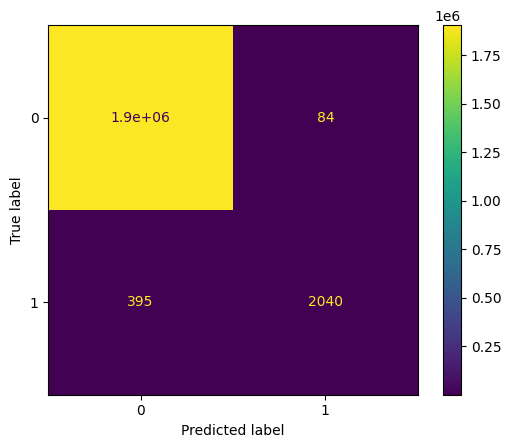

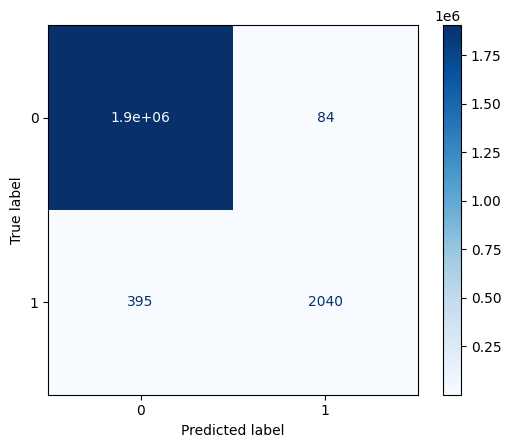

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(models[1], X_test, y_test) 

cm.plot(cmap='Blues') 

plt.show()